# Explorative Korpusanalyse des Datensatzes Wissenschaft

## Vorbereitung

Daten einlesen

In [96]:
import pandas as pd
import nltk
import spacy
from collections import Counter
from spacy.tokens import Doc
from tqdm.notebook import tqdm

In [97]:
nlp = spacy.load('de_core_news_sm')

In [98]:
tweets_wissenschaft = pd.read_excel("./data/tweets_wissenschaft.xlsx")
accounts_wissenschaft = pd.read_excel('./data/accounts_wissenschaft.xlsx')

In [99]:
def update_astype_tweets(df):
    df['tweet_text'] = df['tweet_text'].astype(str)
    df['tweet_text'] = df['tweet_text'].replace('-998', '')
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].astype(str)
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].replace('-998', '')
    df['zitat_text'] = df['zitat_text'].astype(str)
    df['zitat_text'] = df['zitat_text'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

def update_astype_bios(df):
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

In [100]:
update_astype_tweets(tweets_wissenschaft)
update_astype_bios(accounts_wissenschaft)

Laden der Spacy Docs

In [101]:
def load_spacy_docs_tweets(df, name):
    tweet_doc = []
    retweet_doc = []
    zitat_doc = []
    for index, row in df.iterrows():
        filename_tweet = "tweet_" + str(index).replace(" ", "") + ".txt"
        tweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/tweets/{filename_tweet}"))

        filename_retweet = "retweet_" + str(index).replace(" ", "") + ".txt"
        retweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/retweets/{filename_retweet}"))

        filename_zitat = "zitat_" + str(index).replace(" ", "") + ".txt"
        zitat_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/zitat_tweets/{filename_zitat}"))
  
    # add the list of spacy docs as a new column to the dataframe
    df[f"spacy_doc_tweets"] = tweet_doc
    df[f"spacy_doc_retweets"] = retweet_doc
    df[f"spacy_doc_zitat_tweets"] = zitat_doc

In [102]:
def load_spacy_docs_bios(df, name):
    spacy_doc = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        filename_bio = "bio_" + str(index).replace(" ", "") + ".txt"
        spacy_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/{filename_bio}"))
    df[f"spacy_doc_bios"] = spacy_doc

In [103]:
load_spacy_docs_tweets(tweets_wissenschaft, 'tweets_wissenschaft')
load_spacy_docs_bios(accounts_wissenschaft, 'bios_wissenschaft')

  0%|          | 0/1699 [00:00<?, ?it/s]

In [104]:
tweets_wissenschaft.head()

tweet_date_create tweet_creator_atName  \
0 2022-12-14 20:27:18               olewin   
1 2022-12-14 20:44:13        CorinnaEhlers   
2 2022-12-14 21:01:37                t3pad   
3 2022-12-14 21:20:53            uehackler   
4 2022-12-14 21:28:53            agriachim   

                           tweet_creator_screenName  \
0                        @olewin@mastodon.social 🇪🇺   
1  Corinna Ehlers (corinnaehlers@openbiblio.social)   
2                               Sonnen-τau (he/him)   
3                                U.E. Hackler🇩🇪🇯🇵🇺🇸   
4                                     Achim Spiller   

                                   tweet_creator_bio  \
0  Earthling of European origin. #Nachhaltigkeit ...   
1  Grenzgängerin Theologie/Bibliothekswesen im FI...   
2  Wer nur auf mein Gendern eingeht, hat offensic...   
3  Ph.D. in Chemistry, Languages: German, English...   
4  Professor Lebensmittel- u. Agrarmarketing Uni ...   

                                          tweet_text  \
0  Die Politikerin @starkwatzinger schätzt, dass ...   
1                                                      
2                                                      
3                                                      
4  Beide waren tolle Partner im Bioweiderindproje...   

                        retweet_text_retweeted_tweet  \
0                                                      
1  Forschungsstipendien an der Reformationsgeschi...   
2  Kernfusion ist keine Lösung in der Klimakrise ...   
3  Der sensationelle Erfolg der USA bei der #Kern...   
4                                                      

                                          zitat_text    gender institution  \
0  Auch Deutschland habe Stärken in der Kernfusio...  männlich      Person   
1                                                     weiblich      Person   
2                                                     männlich      Person   
3                                                     männlich      Person   
4  Die Erzeugergemeinschaft Schwarzwald Bio-#Weid...  männlich      Person   

      author_category                                   spacy_doc_tweets  \
0    wissenschaftsnah  (Die, Politikerin, @starkwatzinger, schätzt, ,...   
1  Wissenschaftler*in                                                 ()   
2    wissenschaftsnah                                                 ()   
3  Wissenschaftler*in                                                 ()   
4  Wissenschaftler*in  (Beide, waren, tolle, Partner, im, Bioweiderin...   

                                  spacy_doc_retweets  \
0                                                 ()   
1  (Forschungsstipendien, an, der, Reformationsge...   
2  (Kernfusion, ist, keine, Lösung, in, der, Klim...   
3  (Der, sensationelle, Erfolg, der, USA, bei, de...   
4                                                 ()   

                              spacy_doc_zitat_tweets  
0  (Auch, Deutschland, habe, Stärken, in, der, Ke...  
1                                                 ()  
2                                                 ()  
3                                                 ()  
4  (Die, Erzeugergemeinschaft, Schwarzwald, Bio-#...

In [105]:
accounts_wissenschaft.head()

tweet_creator_atName        tweet_creator_screenName  \
0      lisacarstensen5  @lisacarstensen@toot.community   
1       MoritzQueisner                 Moritz Queisner   
2          student8204                          mateus   
3          gunnar_beck                 Dr. Gunnar Beck   
4           TamboMarco                 Marco Tamborini   

                                   tweet_creator_bio    gender institution  \
0  Social Scientist, she/her, Global Political Ec...  weiblich      Person   
1  Professor @ChariteBerlin. Digital health, tech...  männlich      Person   
2                                                     männlich      Person   
3  Europaabgeordneter der @AfD 🇩🇪 Stellvertretend...  männlich      Person   
4  historian and philosopher of science and techn...  männlich      Person   

                  author_category  \
0              Wissenschaftler*in   
1              Wissenschaftler*in   
2                wissenschaftsnah   
3  Wissenschaftsnahe Politiker*in   
4              Wissenschaftler*in   

                                      spacy_doc_bios  
0  (Social, Scientist, ,, she, /, her, ,, Global,...  
1  (Professor, @ChariteBerlin, ., Digital, health...  
2                                                 ()  
3  (Europaabgeordneter, der, @AfD, 🇩, 🇪, Stellver...  
4  (historian, and, philosopher, of, science, and...

In [106]:
tweets_wissenschaft.to_excel('tweets_wissenschaft_spacy.xlsx')

## Statistiken

### Verhältnis Tweets - Retweets - Zitierte Tweets

In [107]:
def count_tweet_type(df):
    count_tweets = (df['spacy_doc_tweets'].apply(lambda doc: len(doc) > 0)).sum() 
                     
    count_retweets = (df['spacy_doc_retweets'].apply(lambda doc: len(doc) > 0)).sum()

    count_zitat =  (df['spacy_doc_zitat_tweets'].apply(lambda doc: len(doc) > 0)).sum()
    
    # Gesamtanzahl der Zeilen im DataFrame
    total_rows = len(df)

    # Berechnung der relativen Häufigkeiten
    relative_tweets = count_tweets / total_rows
    relative_retweets = count_retweets / total_rows
    relative_zitat = count_zitat / total_rows

    print(f"Anzahl Tweets: {count_tweets} ({relative_tweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl Retweets: {count_retweets} ({relative_retweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl zitierte Tweets: {count_zitat} ({relative_zitat:.2%} der Gesamtanzahl)")

In [108]:
count_tweet_type(tweets_wissenschaft)

Anzahl Tweets: 1794 (47.85% der Gesamtanzahl)
Anzahl Retweets: 1955 (52.15% der Gesamtanzahl)
Anzahl zitierte Tweets: 864 (23.05% der Gesamtanzahl)


### Verteilung der Accounts

In [109]:
accounts_wissenschaft.shape

(1699, 7)

In [110]:
institution_counts = accounts_wissenschaft['institution'].value_counts()
institution_percentages = (institution_counts / institution_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Accounts nach Institution:")
print(institution_counts)
print("\nProzentsatz der Accounts nach Institution:")
print(institution_percentages)

Anzahl der Accounts nach Institution:
institution
Person                    1430
Forschungsinstitution      229
Universität/Hochschule      40
Name: count, dtype: int64

Prozentsatz der Accounts nach Institution:
institution
Person                    84.167157
Forschungsinstitution     13.478517
Universität/Hochschule     2.354326
Name: count, dtype: float64


In [111]:
category_counts = accounts_wissenschaft['author_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Accounts nach Kategorie:")
print(category_counts)
print("\nProzentsatz der Accounts nach Kategorie:")
print(category_percentages)

Anzahl der Accounts nach Kategorie:
author_category
Wissenschaftler*in                     962
wissenschaftsnah                       456
unklar                                 269
Wissenschaftsnahe Politiker*in          11
Wissenschaftler*in und Politiker*in      1
Name: count, dtype: int64

Prozentsatz der Accounts nach Kategorie:
author_category
Wissenschaftler*in                     56.621542
wissenschaftsnah                       26.839317
unklar                                 15.832843
Wissenschaftsnahe Politiker*in          0.647440
Wissenschaftler*in und Politiker*in     0.058858
Name: count, dtype: float64


In [112]:
gender_counts = accounts_wissenschaft[accounts_wissenschaft['institution'] == 'Person']['gender'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum()) * 100

print("Anzahl der Accounts nach Gender:")
print(gender_counts)
print("\nProzentsatz der Accounts nach Gender:")
print(gender_percentages)

Anzahl der Accounts nach Gender:
gender
männlich     796
weiblich     569
unklar        53
non-binär     12
Name: count, dtype: int64

Prozentsatz der Accounts nach Gender:
gender
männlich     55.664336
weiblich     39.790210
unklar        3.706294
non-binär     0.839161
Name: count, dtype: float64


### Verteilung der Tweets

In [113]:
tweets_wissenschaft.shape

(3749, 13)

In [114]:
institution_counts = tweets_wissenschaft['institution'].value_counts()
institution_percentages = (institution_counts / institution_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Tweets nach Institution:")
print(institution_counts)
print("\nProzentsatz der Tweets nach Institution:")
print(institution_percentages)

Anzahl der Tweets nach Institution:
institution
Person                    3150
Forschungsinstitution      485
Universität/Hochschule     114
Name: count, dtype: int64

Prozentsatz der Tweets nach Institution:
institution
Person                    84.022406
Forschungsinstitution     12.936783
Universität/Hochschule     3.040811
Name: count, dtype: float64


In [115]:
category_counts = tweets_wissenschaft['author_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Tweets nach Kategorie:")
print(category_counts)
print("\nProzentsatz der Tweets nach Kategorie:")
print(category_percentages)

Anzahl der Tweets nach Kategorie:
author_category
Wissenschaftler*in                     2026
wissenschaftsnah                       1093
unklar                                  599
Wissenschaftsnahe Politiker*in           27
Wissenschaftler*in und Politiker*in       4
Name: count, dtype: int64

Prozentsatz der Tweets nach Kategorie:
author_category
Wissenschaftler*in                     54.041078
wissenschaftsnah                       29.154441
unklar                                 15.977594
Wissenschaftsnahe Politiker*in          0.720192
Wissenschaftler*in und Politiker*in     0.106695
Name: count, dtype: float64


In [116]:
gender_counts = tweets_wissenschaft[tweets_wissenschaft['institution'] == 'Person']['gender'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum()) * 100

print("Anzahl der Tweets nach Gender:")
print(gender_counts)
print("\nProzentsatz der Tweets nach Gender:")
print(gender_percentages)

Anzahl der Tweets nach Gender:
gender
männlich     1761
weiblich     1201
unklar        168
non-binär      20
Name: count, dtype: int64

Prozentsatz der Tweets nach Gender:
gender
männlich     55.904762
weiblich     38.126984
unklar        5.333333
non-binär     0.634921
Name: count, dtype: float64


### Token + Sentences

In [117]:
def get_token_sent_counts(df):
    result = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        token_counter = 0
        sentence_counter = 0
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            spacy_doc = row[f"spacy_doc_{name}"]
            # Überprüfe, ob das Spacy-Dokument nicht leer ist
            if len(spacy_doc) > 0:
                for sent in spacy_doc.sents:
                    sentence_counter += 1
                    for token in sent:
                        # Überprüfen Sie die Token-Eigenschaften für die Filterung
                        if not (token.is_punct or
                                token.is_space or
                                token.is_digit or
                                token.is_quote or
                                token.like_url or
                                token.like_email):
                            token_counter += 1
        result[name] = (token_counter, sentence_counter)
    return result


In [118]:
counts = get_token_sent_counts(tweets_wissenschaft)

  0%|          | 0/3749 [00:00<?, ?it/s]

  0%|          | 0/3749 [00:00<?, ?it/s]

  0%|          | 0/3749 [00:00<?, ?it/s]

In [119]:
data = {'Category': ['Tokens', 'Sentences'],
        'Tweets': [counts['tweets'][0], counts['tweets'][1]],
        'Retweets': [counts['retweets'][0], counts['retweets'][1]],
        'Zitierte Tweets': [counts['zitat_tweets'][0], counts['zitat_tweets'][1]],
       }

tok_sent = pd.DataFrame(data)
tok_sent

Category  Tweets  Retweets  Zitierte Tweets
0     Tokens   50095     58202            26100
1  Sentences    5772      6774             2917

In [120]:
def stats(counts, column, df):
    valid_rows = sum(1 for index, row in df.iterrows() if len(row[f"spacy_doc_{column}"]) > 0)
    mean_tok = counts[column][0] / valid_rows
    mean_sent = counts[column][1] / valid_rows
    tok_per_sent = counts[column][0] / counts[column][1]
    return [mean_tok, mean_sent, tok_per_sent]

In [121]:
data = {'Category': ['Mean Tokens per Tweet', 'Mean Sentences per Tweet', 'Tokens per Sentence'],
        'Tweets': stats(counts, 'tweets', tweets_wissenschaft) ,
        'Retweets': stats(counts, 'retweets', tweets_wissenschaft) ,
        'Zitierte Tweets': stats(counts, 'zitat_tweets', tweets_wissenschaft) ,
       }
tok_sent_stats = pd.DataFrame(data)
tok_sent_stats

Category     Tweets   Retweets  Zitierte Tweets
0     Mean Tokens per Tweet  27.923634  29.770844        30.208333
1  Mean Sentences per Tweet   3.217391   3.464962         3.376157
2       Tokens per Sentence   8.678967   8.591969         8.947549

#### Type-Token Verhältnis

Lemmas extrahieren

In [122]:
def get_lemmas(df):
    lemmas = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        lemmas[name] = []  # Initialisieren Sie die Liste für den Schlüssel 'name'
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            for token in row[f"spacy_doc_{name}"]:
                if not token.is_punct and \
                    not token.is_space and \
                    not token.is_bracket and \
                    not token.is_digit and \
                    not token.is_quote and \
                    not token.like_url and \
                    not token.like_email:
                    lemmas[name].append(token.lemma_)
    return lemmas

In [123]:
lemmas_tweets = get_lemmas(tweets_wissenschaft)

  0%|          | 0/3749 [00:00<?, ?it/s]

  0%|          | 0/3749 [00:00<?, ?it/s]

  0%|          | 0/3749 [00:00<?, ?it/s]

Type-Token-Ratio berechnen

In [124]:
from lexical_diversity import lex_div as ld

In [125]:
data = {'Category': ['Type Token Ratio'],
        'Tweets': ld.ttr(lemmas_tweets["tweets"]),
        'Retweets': ld.ttr(lemmas_tweets["retweets"]),
        'Zitierte Tweets': ld.ttr(lemmas_tweets["zitat_tweets"]),
       }
ttr = pd.DataFrame(data)
ttr

Category    Tweets  Retweets  Zitierte Tweets
0  Type Token Ratio  0.241065  0.159999         0.212293

#### Token per Bio

In [126]:
def calculate_token_stats(docs):
    num_tokens = [len(doc) for doc in docs]

    min_tokens = min(num_tokens)
    max_tokens = max(num_tokens)
    avg_tokens = sum(num_tokens) / len(num_tokens)

    return min_tokens, max_tokens, avg_tokens

min_tokens, max_tokens, avg_tokens = calculate_token_stats(accounts_wissenschaft['spacy_doc_bios'])

print("Minimal tokens in bio:", min_tokens)
print("Maximal tokens in bio:", max_tokens)
print("Durchschnittliche tokens in bio:", avg_tokens)

Minimal tokens in bio: 0
Maximal tokens in bio: 45
Durchschnittliche tokens in bio: 19.23955267804591


## Häufigste Wörter

### Tweets

#### WordCloud Funktion

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [128]:
def create_wordcloud(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=1500, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [129]:
def create_wordcloud_vertical(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=700, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Die häufigsten Wörter 1 - ohne Stoppwörter

In [130]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter
import string

In [131]:
def filter_tokens(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop 
            and not token.is_punct and not token.like_num]

In [132]:
def common_words1(df, name):
    words = []
    for doc in df[f"spacy_doc_{name}"]:
        if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
            words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(50)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [133]:
def common_words_all1(df):
    words = []
    names = ["tweets", "retweets", "zitat_tweets"]
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
                words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [134]:
common_words_tweets = common_words1(tweets_wissenschaft, 'tweets')
common_words_retweets = common_words1(tweets_wissenschaft, 'retweets')
common_words_zitat_tweets = common_words1(tweets_wissenschaft, 'zitat_tweets')
common_words_all = common_words_all1(tweets_wissenschaft)

In [135]:
common_words_tweets

word  freq
0          forschung  1283
1              lehre   102
2       wissenschaft    78
3                  ️    74
4           brauchen    71
5              thema    69
6                 --    67
7            wichtig    65
8                mal    64
9              sehen    61
10            studie    61
11                      61
12           aktuell    58
13            zeigen    58
14            mensch    55
15            finden    54
16                 👇    52
17             frage    50
18               neu    49
19           einfach    49
20                 👉    49
21       entwicklung    47
22          spannend    47
23            wissen    46
24           projekt    42
25             prof.    42
26  @karl_lauterbach    41
27       deutschland    40
28               dr.    40
29             mecfs    40
30          sprechen    38
31            helfen    37
32           phdlife    37
33           bereich    36
34             innen    36
35           problem    35
36            arbeit    35
37            stehen    35
38       ichbinhanna    34
39             genau    34
40              klar    34
41  wissenschaftlich    34
42            freuen    34
43             gerne    33
44           letzter    33
45          ergebnis    33
46                 ➡    33
47              geld    32
48           beitrag    32
49        innovation    32

In [136]:
common_words_retweets

word  freq
0      forschung  1384
1   wissenschaft   187
2              ️   157
3          lehre   141
4         mensch   110
5          thema   105
6          mecfs    96
7       brauchen    95
8    ichbinhanna    92
9         berlin    88
10            --    86
11       aktuell    85
12     longcovid    82
13         innen    79
14      spannend    77
15       wichtig    76
16             👉    74
17   deutschland    71
18        studie    69
19        freuen    69
20         infos    69
21           mal    69
22      forschen    67
23       projekt    66
24       bildung    65
25             ⬇    65
26           neu    63
27             ➡    61
28        suchen    57
29           the    57
30        finden    56
31        sofort    56
32       digital    54
33     anmeldung    54
34       einfach    53
35         prof.    51
36          toll    51
37    versorgung    51
38           dr.    51
39        online    50
40        zeigen    49
41      wisskomm    49
42             +    49
43       bereich    47
44         unser    47
45        wissen    47
46         sehen    47
47    innovation    46
48   betroffener    45
49        medium    44

In [137]:
common_words_zitat_tweets

word  freq
0          forschung   489
1                  ️   115
2                 --   100
3      demonstrieren    86
4              lehre    82
5                  ➡    70
6          gemeinsam    67
7           brauchen    67
8                the    55
9        information    54
10           aufgabe    52
11      wissenschaft    51
12             china    49
13         verlässen    49
14         professor    48
15             april    48
16             falls    48
17               uni    47
18            widmen    47
19             klima    46
20             liebe    46
21            lothar    46
22                h.    46
23            wieler    46
24               amt    46
25       niederlegen    46
26              euer    45
27               rki    45
28  pressemitteilung    45
29         @bmg_bund    45
30       dankewieler    45
31          dringend    45
32     klimaschützer    43
33          ansinnen    43
34              ehre    43
35          fleissig    43
36         engagiert    43
37             demos    43
38        innovation    39
39     international    38
40            mensch    38
41                 👉    38
42                 👇    35
43       ichbinhanna    33
44               neu    31
45               for    31
46  wissenschaftlich    31
47           bildung    31
48         longcovid    31
49                to    29

In [138]:
common_words_all

word  freq
0      forschung  3156
1              ️   346
2          lehre   325
3   wissenschaft   316
4             --   253
..           ...   ...
95      ergebnis    69
96         falls    69
97        stehen    69
98      dringend    69
99            h.    69

[100 rows x 2 columns]

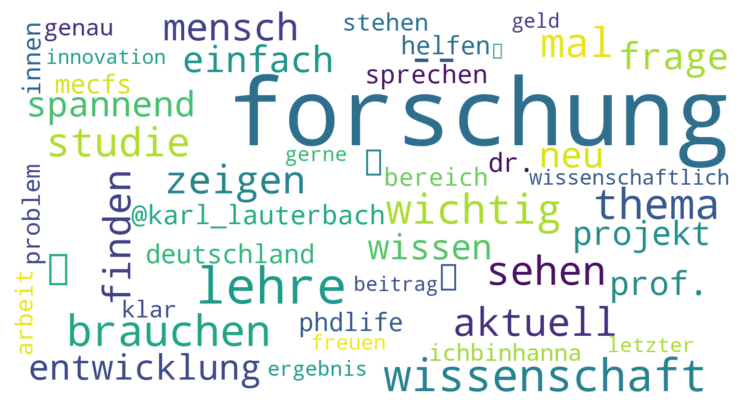

In [139]:
create_wordcloud(common_words_tweets)

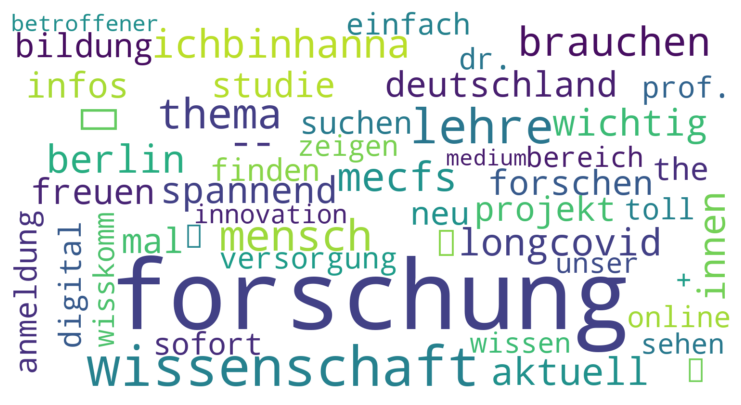

In [140]:
create_wordcloud(common_words_retweets)

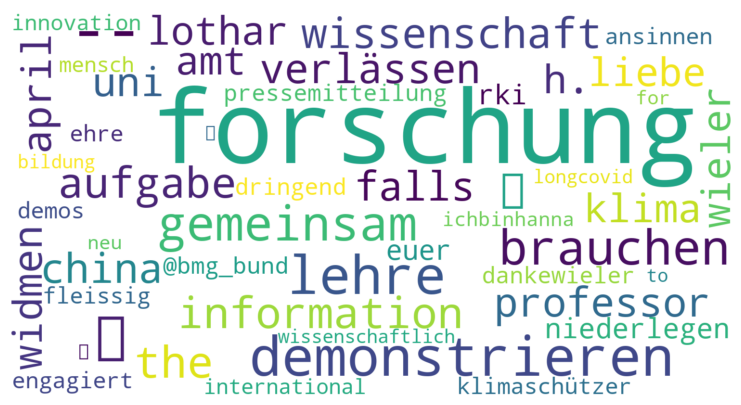

In [141]:
create_wordcloud(common_words_zitat_tweets)

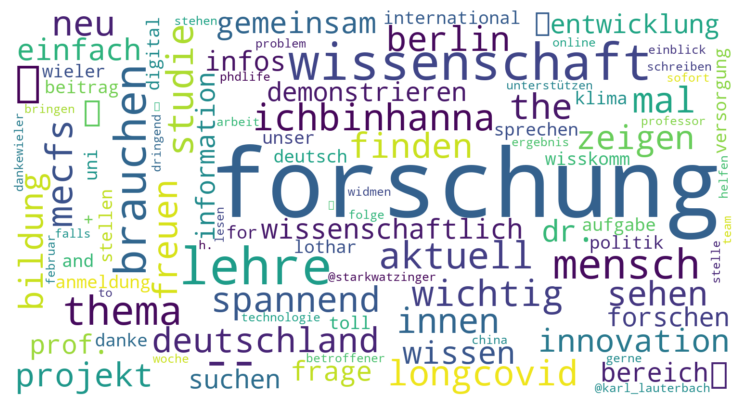

In [142]:
create_wordcloud(common_words_all)

#### Die häufigsten Wörter 2- ohne Stoppwörter und Hashtags

In [143]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annalenahiergeist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [144]:
def common_words2(tweets):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()

    # Iteration über jeden Tweet
    for tweet in tweets:
        # Entfernen von Hashtags
        words = tweet.split()
        words = [word for word in words if not word.startswith('#')]

        # Wieder zusammenfügen zu einem String und Tokenisierung
        tweet = ' '.join(words)
        tokens = word_tokenize(tweet, language='german')

        # Filtern der Stoppwörter und Zählen
        words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
        word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [145]:
def common_words_all2(df):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()
    words = []
    names = ["tweet_text", "retweet_text_retweeted_tweet", "zitat_text"]
    for name in names:
           for tweet in df[name]:
               # Entfernen von Hashtags
                words = tweet.split()
                words = [word for word in words if not word.startswith('#')]
               
                # Wieder zusammenfügen zu einem String und Tokenisierung
                tweet = ' '.join(words)
                tokens = word_tokenize(tweet, language='german')

                # Filtern der Stoppwörter und Zählen
                words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
                word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [146]:
common_words_tweets2 = common_words2(tweets_wissenschaft['tweet_text'])
common_words_retweets2 = common_words2(tweets_wissenschaft['retweet_text_retweeted_tweet'])
common_words_zitat_tweets2 = common_words2(tweets_wissenschaft['zitat_text'])
common_words_all2 = common_words_all2(tweets_wissenschaft)

In [147]:
common_words_tweets2.head(50)

word  freq
0      forschung  1158
1            die   189
2            das   155
3            ich   141
4             es   119
5            sie   110
6            und   102
7            wir    94
8          lehre    86
9             in    73
10  wissenschaft    66
11           mal    64
12         innen    64
13           wie    63
14           der    55
15          aber    54
16         thema    54
17      menschen    52
18        jahren    51
19            im    50
20           was    50
21          wenn    49
22       einfach    47
23           ein    46
24          mehr    46
25         zeigt    43
26       braucht    42
27          auch    41
28   entwicklung    40
29           the    40
30           mit    39
31          zeit    39
32         danke    38
33         frage    38
34   deutschland    36
35       wichtig    36
36         jahre    33
37         gerne    33
38          hier    33
39            du    33
40          welt    30
41        wissen    30
42          klar    30
43         heute    30
44          jahr    29
45          geld    29
46         genau    29
47       projekt    28
48            so    28
49           wer    28

In [148]:
common_words_retweets2.head(50)

word  freq
0      forschung  1160
1            die   329
2            wir   190
3            das   165
4          innen   141
5          lehre   130
6   wissenschaft   129
7            sie   124
8             es   111
9       menschen   106
10           der   101
11           ich    93
12        jahren    91
13            im    85
14          auch    81
15           wie    78
16           ein    74
17           the    74
18          mehr    72
19         thema    71
20         infos    69
21           mal    69
22            in    64
23           was    64
24        freuen    63
25           mit    58
26      forschen    57
27        sofort    56
28        berlin    54
29            am    54
30       einfach    53
31           wer    52
32   deutschland    51
33          euch    51
34        online    50
35          alle    50
36     anmeldung    50
37         jetzt    49
38           für    49
39          jahr    48
40          eine    48
41         jahre    47
42          hier    47
43       braucht    46
44           und    46
45         danke    46
46    versorgung    46
47          zeit    44
48       projekt    44
49       stellen    43

In [149]:
common_words_zitat_tweets2.head(50)

word  freq
0          forschung   420
1                die    88
2                das    82
3              lehre    78
4                wir    78
5                the    76
6               alle    63
7                ihr    55
8              liebe    52
9      informationen    51
10             innen    50
11                er    50
12                of    49
13          verlässt    49
14             china    48
15             april    48
16             falls    48
17               uni    47
18          aufgaben    47
19         professor    47
20             klima    46
21            lothar    46
22            wieler    46
23               amt    46
24       niederlegen    46
25            widmen    46
26       gemeinsamen    46
27                da    46
28              also    46
29               rki    45
30  pressemitteilung    45
31          dringend    45
32     klimaschützer    43
33              euer    43
34          ansinnen    43
35             ehren    43
36     demonstrieren    43
37          fleissig    43
38         engagiert    43
39      demonstriert    43
40             demos    43
41         gebraucht    43
42               sie    42
43               der    36
44               was    35
45      wissenschaft    35
46               ich    34
47          menschen    34
48                im    34
49              hier    31

In [150]:
common_words_all2.head(50)

word  freq
0       forschung  2738
1             die   606
2             das   402
3             wir   362
4           lehre   294
5             sie   276
6             ich   268
7              es   261
8           innen   255
9    wissenschaft   230
10            der   192
11       menschen   192
12            the   190
13            wie   169
14             im   169
15         jahren   167
16             in   165
17            und   164
18            was   149
19            mal   148
20           auch   142
21            ein   141
22          thema   140
23           mehr   137
24            mit   127
25           alle   122
26           hier   111
27           wenn   110
28        einfach   108
29         freuen   108
30            ihr   108
31           jahr   106
32    deutschland   106
33          jahre   105
34          infos   104
35             of   103
36            wer   102
37            für   100
38        braucht    98
39          danke    96
40           also    95
41          zeigt    95
42           zeit    95
43            and    94
44         berlin    91
45  informationen    91
46           eine    90
47        bildung    89
48          jetzt    89
49            for    88

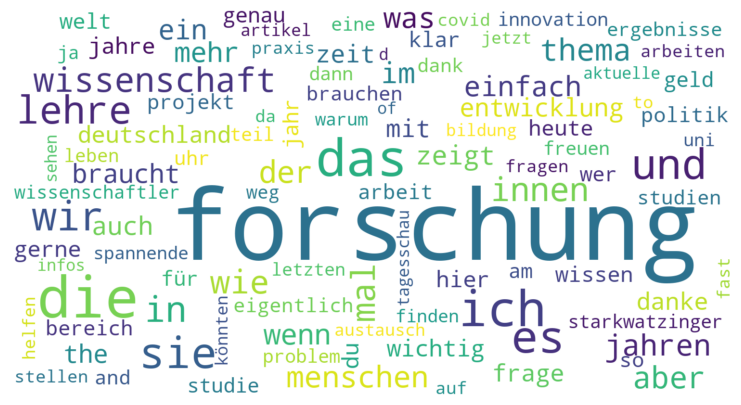

In [151]:
create_wordcloud(common_words_tweets2)

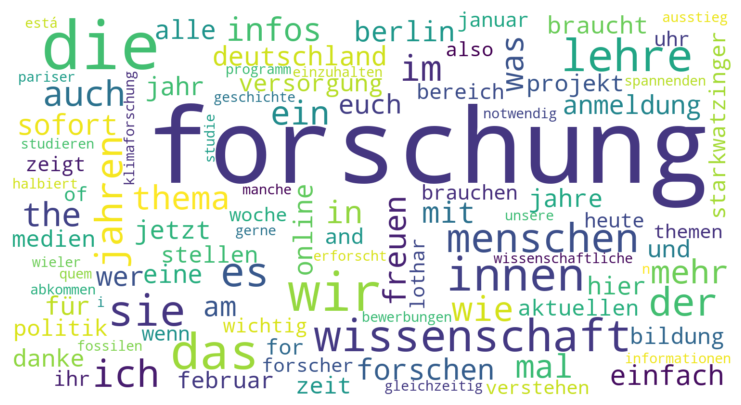

In [152]:
create_wordcloud(common_words_retweets2)

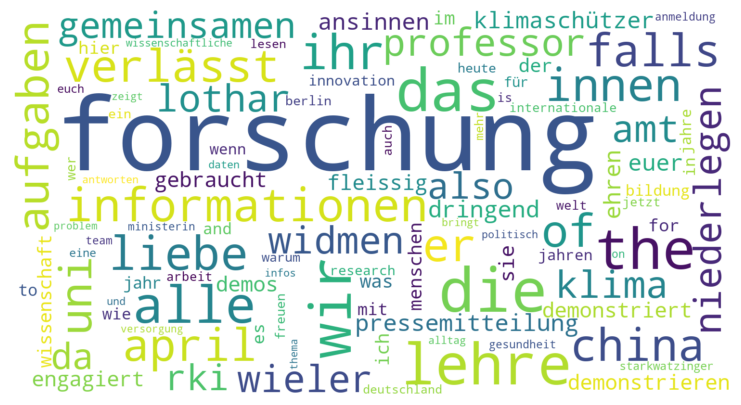

In [153]:
create_wordcloud(common_words_zitat_tweets2)

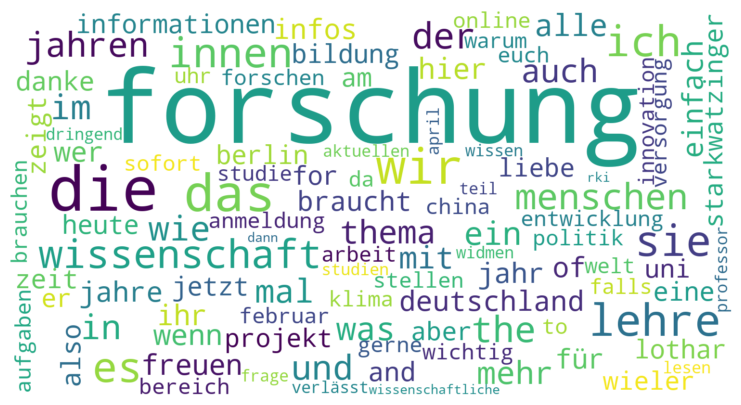

In [154]:
create_wordcloud(common_words_all2)

#### Häufigste Adjektive

In [155]:
def common_adjectives(df, name):
    adj_freq = Counter()
    for doc in df[f"spacy_doc_{name}"]:
        # Filtern nach Adjektiven und Zählen
        adjectives = [token.text.lower() for token in doc if token.text.isalpha() and token.pos_ == 'ADJ']
        adj_freq.update(adjectives)

    sorted_word_freq = adj_freq.most_common(100)
    common_adjectives = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_adjectives

In [156]:
def common_adjectives_all(df):
    names = ["tweets", "retweets", "zitat_tweets"]
    adj_freq = Counter()
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            adjectives = [token.text.lower() for token in doc if token.text.isalpha() and token.pos_ == 'ADJ']
            adj_freq.update(adjectives)

    sorted_word_freq = adj_freq.most_common(100)
    common_adjectives = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_adjectives

In [157]:
adjectives_tweets = common_adjectives(tweets_wissenschaft, 'tweets')
adjectives_retweets = common_adjectives(tweets_wissenschaft, 'retweets')
adjectives_zitat_tweets = common_adjectives(tweets_wissenschaft, 'zitat_tweets')
adjectives_all = common_adjectives_all(tweets_wissenschaft)

In [158]:
adjectives_all.head(50)

word  freq
0                 neue   192
1                neuen   172
2                 gute    95
3                liebe    67
4            aktuellen    65
5    wissenschaftliche    61
6          gemeinsamen    59
7            deutschen    50
8            spannende    49
9              weitere    48
10               tolle    47
11             letzten    47
12            aktuelle    43
13              eigene    42
14          spannenden    41
15               echte    39
16              andere    36
17      internationale    36
18            wichtige    36
19               neuer    35
20           digitalen    34
21            digitale    33
22          herzlichen    32
23             eigenen    32
24               erste    32
25               neues    32
26             pariser    30
27          innovative    29
28  wissenschaftlichen    28
29               junge    28
30          bisherigen    28
31        erfolgreiche    28
32                este    27
33            nächsten    26
34              großen    25
35               alten    25
36    respiratorischen    25
37             bessere    24
38        medizinische    24
39          empirische    23
40               guten    23
41            heutigen    22
42          exzellente    22
43            deutsche    22
44            mögliche    22
45        verschiedene    21
46        akademischen    21
47          gemeinsame    20
48               guter    20
49   interdisziplinäre    20

In [159]:
adjectives_tweets.head(50)

word  freq
0                 neue    49
1                neuen    39
2                 gute    39
3               eigene    22
4              letzten    22
5               andere    22
6            spannende    21
7             aktuelle    19
8            aktuellen    18
9           herzlichen    16
10               neuer    16
11             eigenen    15
12               tolle    14
13   wissenschaftliche    14
14            wichtige    14
15               guten    14
16             anderen    13
17           deutschen    13
18             weitere    13
19               große    12
20             bessere    11
21        interessante    11
22         empirischer    10
23               liebe    10
24              großen    10
25          empirische    10
26               ganze     9
27  wissenschaftlichen     9
28        medizinische     9
29               guter     9
30           klinische     9
31    unterschiedliche     8
32            digitale     8
33       medizinischen     8
34             eigener     8
35              ersten     7
36              letzte     7
37               echte     7
38      internationale     7
39          spannenden     7
40            weiteren     7
41          innovative     7
42           kritische     7
43            deutsche     7
44              tollen     7
45               neues     7
46             soziale     7
47        verschiedene     6
48          spannendes     6
49               erste     6

In [160]:
adjectives_retweets.head(50)

word  freq
0                 neue   100
1                neuen    66
2            aktuellen    41
3                 gute    39
4           spannenden    32
5              weitere    31
6    wissenschaftliche    30
7              pariser    30
8            deutschen    25
9                tolle    25
10            digitale    24
11               echte    24
12           digitalen    23
13                este    23
14          bisherigen    22
15    respiratorischen    22
16               erste    21
17             letzten    21
18           spannende    19
19            aktuelle    18
20              eigene    18
21            wichtige    18
22      klimaneutralen    18
23            heutigen    16
24               neues    16
25             eigenen    15
26        erfolgreiche    15
27               junge    14
28   interdisziplinäre    14
29         öffentliche    13
30          exzellente    13
31              tolles    12
32              andere    12
33  wissenschaftlichen    12
34              großen    11
35        medizinische    11
36          herzlichen    11
37            deutsche    11
38             riesige    11
39           wichtigen    11
40            nächsten    11
41               neuer    10
42        verschiedene    10
43          empirische    10
44               guter    10
45          innovative    10
46          befristete    10
47         gemeinsamen    10
48               volle    10
49            holprige    10

In [161]:
adjectives_zitat_tweets.head(50)

word  freq
0                neuen    67
1                liebe    49
2          gemeinsamen    46
3                 neue    43
4       internationale    20
5                 gute    17
6    wissenschaftliche    17
7                alten    14
8            deutschen    12
9           innovative    12
10          gemeinsame    11
11            nächsten    10
12           spannende     9
13               neues     9
14        erfolgreiche     9
15            mögliche     9
16               neuer     9
17               junge     8
18               echte     8
19           weltweite     8
20               tolle     8
21     internationalen     8
22  wissenschaftlichen     7
23              enorme     7
24        unbefristete     6
25          nationalen     6
26             riesige     6
27         nachhaltige     6
28  wissenschaftlicher     6
29        akademischen     6
30           aktuellen     6
31       klimagesundem     6
32          seelischen     6
33           digitalen     6
34            aktuelle     6
35          exzellente     6
36      qualifizierten     5
37         exzellenten     5
38      nervtötendster     5
39            absurden     5
40          künstliche     5
41               erste     5
42           momentane     5
43         sehenswerte     5
44                 jmd     5
45             anderer     5
46              kurzen     5
47        verschiedene     5
48     evidenzbasierte     5
49          bestehende     5

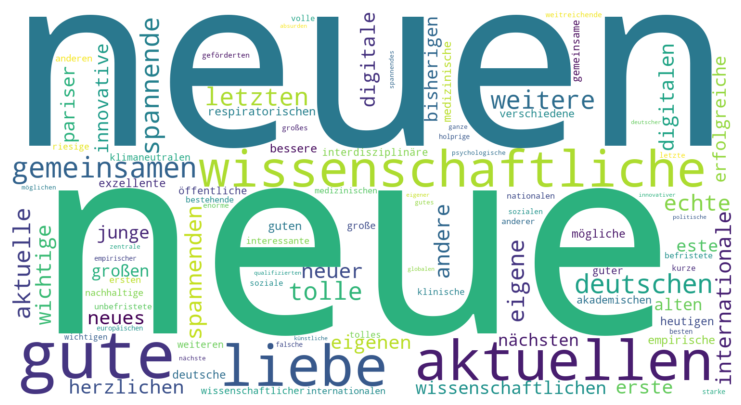

In [162]:
create_wordcloud(adjectives_all)

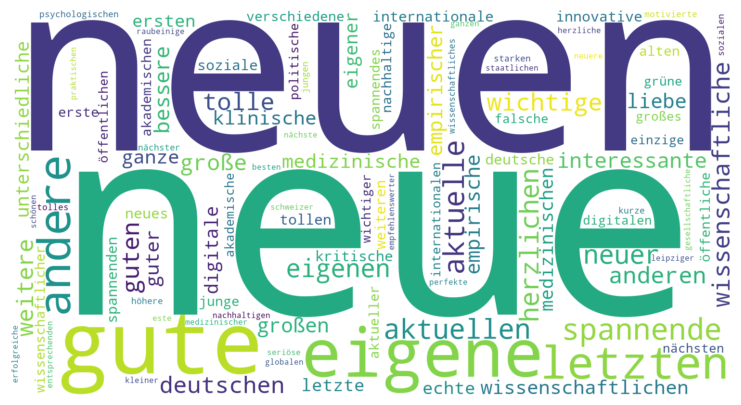

In [163]:
create_wordcloud(adjectives_tweets)

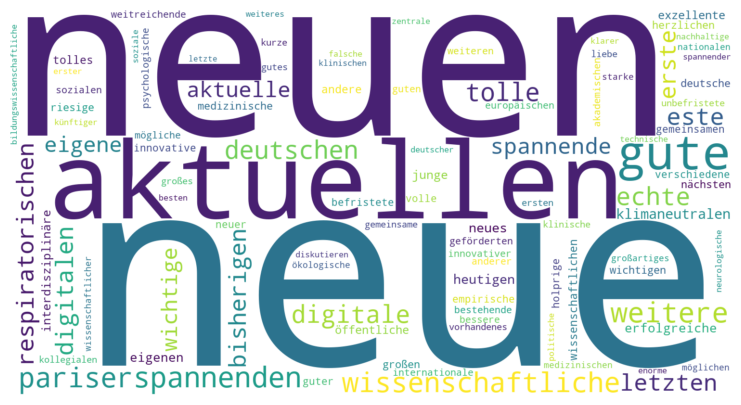

In [164]:
create_wordcloud(adjectives_retweets)

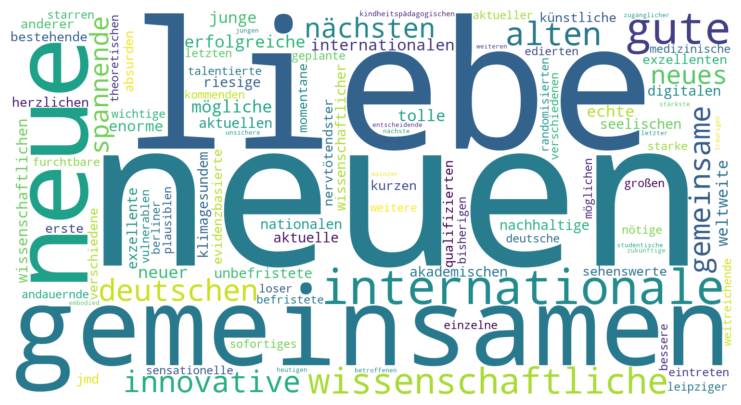

In [165]:
create_wordcloud(adjectives_zitat_tweets)

#### Häufigste Nomen 

In [166]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter

In [167]:
def filter_tokens2(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN"]

In [168]:
def common_nouns(df, name):
    nouns = []
    for doc in df[f"spacy_doc_{name}"]:
        nouns.extend(filter_tokens2(doc))

    noun_freq = Counter(nouns)
    sorted_noun_freq = noun_freq.most_common(50)
    
    common_nouns = pd.DataFrame(sorted_noun_freq, columns=["word", "freq"])

    return common_nouns

In [169]:
common_nouns_tweets = common_nouns(tweets_wissenschaft, 'tweets')
common_nouns_retweets = common_nouns(tweets_wissenschaft, 'retweets')
common_nouns_zitat_tweets = common_nouns(tweets_wissenschaft, 'zitat_tweets')

In [170]:
common_nouns_tweets

word  freq
0         forschung  1274
1             lehre   101
2      wissenschaft    77
3             thema    69
4            mensch    55
5            studie    54
6             frage    49
7       entwicklung    46
8           projekt    42
9             prof.    42
10              dr.    40
11          bereich    36
12          problem    35
13           arbeit    35
14         ergebnis    33
15             geld    32
16          beitrag    32
17             welt    29
18          politik    29
19              uni    29
20            danke    28
21       innovation    28
22          bildung    27
23              weg    27
24      technologie    26
25             kind    23
26         einblick    23
27           praxis    23
28            folge    22
29            datum    22
30  wissenschaftler    21
31             frau    21
32                👉    21
33            leben    20
34  @starkwatzinger    20
35             ding    20
36        interesse    20
37             ziel    20
38        austausch    20
39          artikel    20
40       geschichte    19
41                🇪    19
42         institut    19
43          medizin    19
44             team    19
45           schule    19
46          zukunft    18
47      betroffener    18
48         freiheit    18
49          vortrag    18

In [171]:
common_nouns_retweets

word  freq
0          forschung  1370
1       wissenschaft   178
2              lehre   141
3             mensch   110
4              thema   105
5            projekt    66
6            bildung    63
7             studie    61
8          anmeldung    54
9              prof.    51
10               dr.    51
11        versorgung    50
12           bereich    47
13       betroffener    44
14        innovation    44
15            medium    43
16           politik    43
17           februar    43
18         jahrzehnt    42
19             danke    42
20       technologie    41
21        geschichte    41
22             infos    41
23            stelle    38
24             woche    38
25             frage    38
26  mecfsimbundestag    38
27             folge    37
28            januar    36
29           beitrag    35
30          einblick    34
31       entwicklung    34
32          programm    33
33       information    33
34              frau    32
35          forscher    32
36         bewerbung    32
37    klimaforschung    32
38            umgang    31
39       anerkennung    31
40           zukunft    30
41          abkommen    30
42          ausstieg    30
43           fossile    30
44         ee-ausbau    30
45         professur    29
46          institut    29
47         bundestag    29
48        behandlung    28
49                 🇪    27

In [172]:
common_nouns_zitat_tweets

word  freq
0          forschung   487
1              lehre    82
2        information    52
3            aufgabe    52
4       wissenschaft    49
5          professor    48
6              april    48
7                uni    47
8              klima    46
9                amt    46
10  pressemitteilung    45
11                 ➡    45
12       dankewieler    45
13     klimaschützer    43
14          ansinnen    43
15              ehre    43
16            mensch    38
17        innovation    33
18           bildung    31
19            studie    27
20              team    21
21             folge    21
22          einblick    21
23            stelle    20
24               dr.    20
25              welt    20
26            arbeit    20
27             thema    19
28           problem    19
29        gesundheit    19
30         anmeldung    19
31             datum    18
32           beitrag    17
33        ministerin    17
34                 🤔    17
35       kooperation    16
36       klimawandel    16
37        versorgung    16
38            chance    16
39   @starkwatzinger    16
40       entwicklung    16
41           antwort    16
42            alltag    16
43                 👉    16
44        kernfusion    15
45           projekt    15
46          ergebnis    15
47           februar    15
48             frage    15
49             woche    14

##### Wordclouds

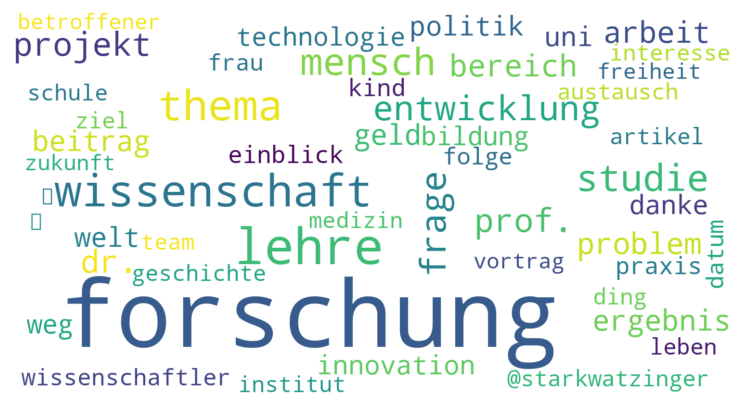

In [173]:
create_wordcloud(common_nouns_tweets)

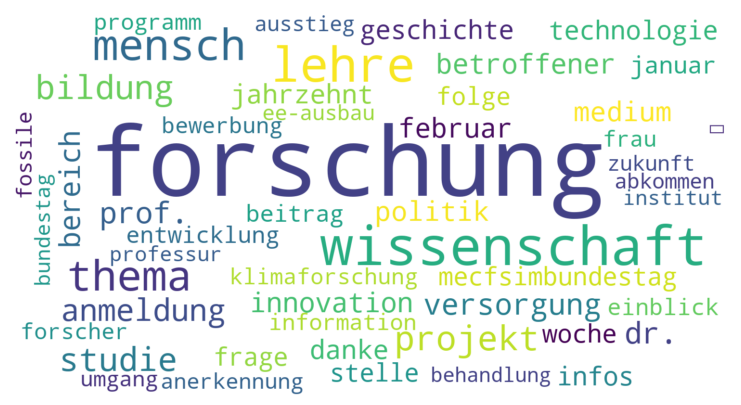

In [174]:
create_wordcloud(common_nouns_retweets)

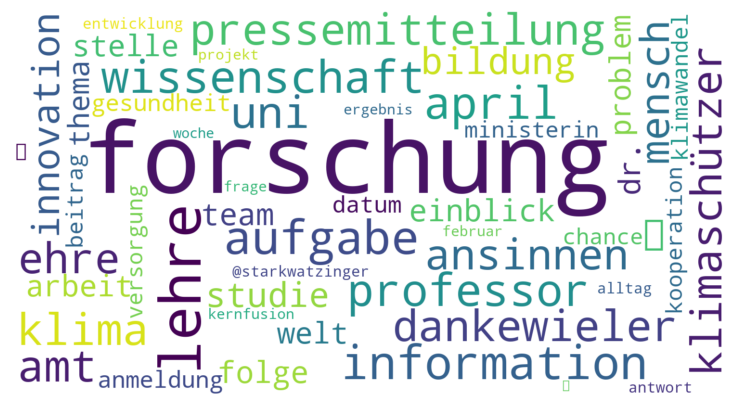

In [175]:
create_wordcloud(common_nouns_zitat_tweets)

### Bios

In [176]:
def common_words_lemmas(lemmas_df):
    word_freq = Counter(lemmas_df)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [177]:
def get_lemmas_bios(df):
    lemmas = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        for token in row[f"spacy_doc_bios"]:
            if not token.is_punct and \
            not token.is_space and \
            not token.is_bracket and \
            not token.is_digit and \
            not token.is_quote and \
            not token.like_url and \
            not token.like_email:
                lemmas.append(token.lemma_)
    return lemmas

In [178]:
lemmas_bios = get_lemmas_bios(accounts_wissenschaft)
common_words_bios = common_words_lemmas(lemmas_bios)

  0%|          | 0/1699 [00:00<?, ?it/s]

In [179]:
common_words_bios

word  freq
0            |  1004
1          und   756
2           in   418
3          der   410
4          and   374
..         ...   ...
95      Public    23
96  Innovation    23
97      Fellow    23
98   Economist    23
99           🇦    23

[100 rows x 2 columns]

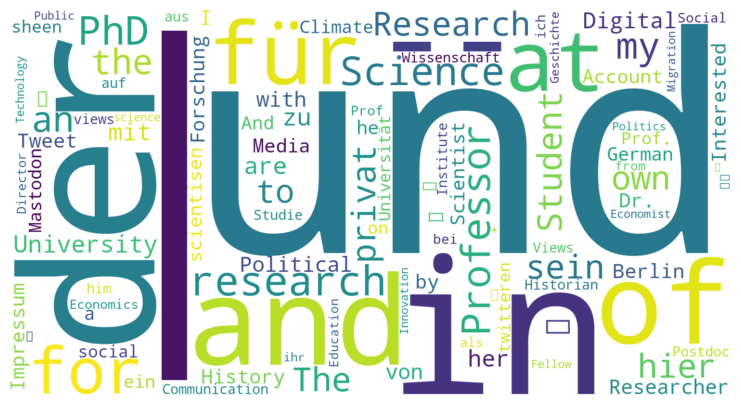

In [180]:
create_wordcloud(common_words_bios)

In [181]:
common_nouns_bios = common_nouns(accounts_wissenschaft, 'bios')
common_nouns_bios

word  freq
0         professor   108
1           student    74
2                 🇪    70
3               dr.    42
4         impressum    40
5         forschung    40
6           account    33
7       universität    32
8      wissenschaft    32
9             prof.    31
10            tweet    28
11       geschichte    24
12            media    21
13          politik    21
14           mutter    20
15       innovation    19
16        migration    18
17         physiker    18
18          medizin    18
19         mitglied    17
20        education    17
21         lecturer    17
22           social    16
23           editor    16
24         institut    16
25           senior    15
26              uni    15
27         director    15
28       historiker    14
29       hochschule    14
30     gesellschaft    14
31           arbeit    14
32          bildung    13
33            lehre    13
34        biologist    13
35       researcher    13
36      professorin    13
37      psychologie    13
38            autor    12
39           former    12
40              she    12
41       management    12
42     historikerin    12
43          biologe    11
44  digitalisierung    11
45             arzt    11
46             team    11
47          zukunft    10
48        literatur    10
49                🇮    10

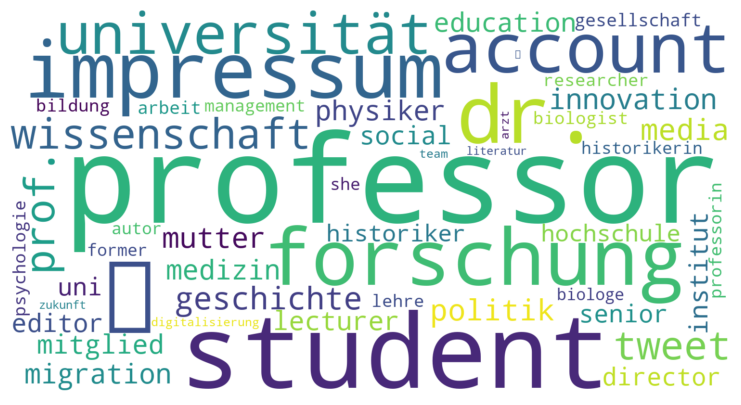

In [182]:
create_wordcloud(common_nouns_bios)

## Analyse der Hashtags

In [183]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [184]:
def count_hashtags_all(df):
    hashtags = []
    
    for index, row in df.iterrows():
        for column in ['tweet_text', 'retweet_text_retweeted_tweet', 'zitat_text']:
            hashtags.extend(re.findall(r'#\w+', str(row[column])))
    
    hashtags_counter = Counter(hashtags)
    
    top_n_hashtags = hashtags_counter.most_common(30)
    for hashtag, count in top_n_hashtags:
        print(f"{hashtag}: {count}")
    
    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtags_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#Forschung: 349
#MECFS: 151
#IchBinHanna: 112
#LongCovid: 110
#Wissenschaft: 71
#DankeWieler: 71
#phdlife: 64
#MECFSimBundestag: 46
#forschung: 45
#IchbinHanna: 44
#IchBinReyhan: 42
#WissKomm: 38
#FDM: 30
#TikTokTagung: 30
#Zukunftsstrategie: 28
#KI: 27
#Wisskomm: 27
#Bildung: 26
#Klimawandel: 26
#Kernfusion: 21
#Lehre: 21
#4GenderStudies: 20
#Innovation: 20
#AcademicChatter: 18
#Digitalisierung: 18
#WirBerlin: 18
#ChatGPT: 17
#PostVac: 17
#Berlin: 16
#Sachsen: 16


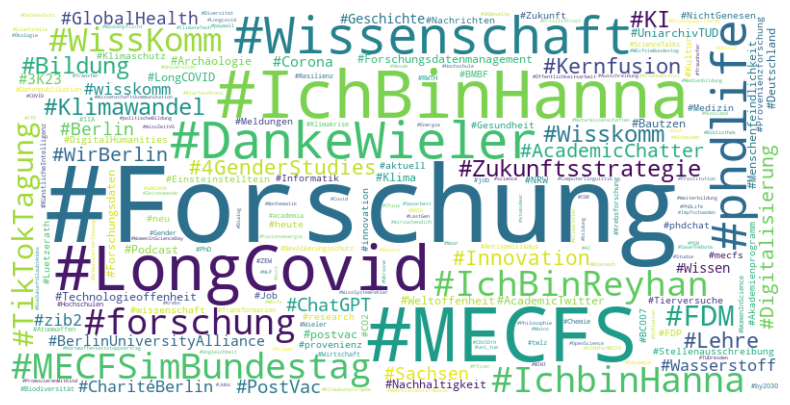

In [185]:
# Tweets Wissenschaft
count_hashtags_all(tweets_wissenschaft)

In [186]:
def count_hashtags_seperate(df):
    hashtags_per_column = {'tweet_text': Counter(), 'retweet_text_retweeted_tweet': Counter(), 'zitat_text': Counter()}
    
    for index, row in df.iterrows():
        for column in hashtags_per_column:
            hashtags_per_column[column].update(re.findall(r'#\w+', str(row[column])))
    
    for column, hashtags_counter in hashtags_per_column.items():
        print(f"Top hashtags in {column}:")
        top_n_hashtags = hashtags_counter.most_common(20)
        for hashtag, count in top_n_hashtags:
            print(f"{hashtag}: {count}")
        print()

In [187]:
count_hashtags_seperate(tweets_wissenschaft)

Top hashtags in tweet_text:
#Forschung: 95
#MECFS: 43
#phdlife: 31
#IchBinHanna: 21
#LongCovid: 20
#forschung: 18
#IchBinReyhan: 12
#Lehre: 11
#MECFSimBundestag: 11
#IchbinHanna: 10
#FDM: 10
#provenienz: 9
#Nachhaltigkeit: 9
#Wissenschaft: 9
#WissKomm: 9
#KI: 8
#RWTH: 7
#Digitalisierung: 7
#Klima: 6
#EinefürAlle: 6

Top hashtags in retweet_text_retweeted_tweet:
#Forschung: 186
#MECFS: 88
#IchBinHanna: 72
#LongCovid: 65
#Wissenschaft: 48
#MECFSimBundestag: 32
#IchBinReyhan: 28
#TikTokTagung: 26
#forschung: 24
#WissKomm: 21
#IchbinHanna: 20
#DankeWieler: 20
#Wisskomm: 18
#WirBerlin: 18
#Bildung: 16
#Zukunftsstrategie: 16
#KI: 13
#Wissen: 13
#BerlinUniversityAlliance: 13
#phdlife: 13

Top hashtags in zitat_text:
#Forschung: 68
#DankeWieler: 45
#LongCovid: 25
#phdlife: 20
#MECFS: 20
#IchBinHanna: 19
#IchbinHanna: 14
#Wissenschaft: 14
#Klimawandel: 13
#Zukunftsstrategie: 11
#CharitéBerlin: 10
#AcademicChatter: 9
#Wisskomm: 9
#FDM: 9
#GlobalHealth: 8
#WissKomm: 8
#Kernfusion: 7
#Podcast: 7
#

## Zusatz

In [188]:
# Suche nach Tweets mit "innen"
common_words_all2.loc[common_words_all2['word'] == 'innen']

word  freq
8  innen   255

In [189]:
for index, row in tweets_wissenschaft.iterrows():
    # Überprüfen, ob 'innen' im 'tweet_text' vorhanden ist
    if pd.notna(row['tweet_text']) and 'innen' in row['tweet_text']:
        print('Tweet:', row['tweet_text'])
    
    if pd.notna(row['retweet_text_retweeted_tweet']) and 'innen' in row['retweet_text_retweeted_tweet']:
        print('Retweet:', row['retweet_text_retweeted_tweet'])

    if pd.notna(row['retweet_text_retweeted_tweet']) and 'innen' in row['retweet_text_retweeted_tweet']:
        print('Zitierter Tweet:', row['zitat_text'])

Retweet: Mareike Trauernicht hat den 2. Preis der Körber Stiftung im Bereich Sozialwissenschaften für Ihre Forschung zum Thema Erschöpfun und Burnout von Erzieher:innen erhalten. Gerade hoch aktuell in der #twitterkita 
Zitierter Tweet: 
Retweet: BMBF-geförderte Forscherinnen und Forscher der @TU_Muenchen und @ALICEexperiment zeigen, wie man Messungen am Large Hadron Collider #LHC verwenden kann, um im Weltall #DunkleMaterie zu suchen. 👉 #Astronomie #Forschung 
Zitierter Tweet: 
Retweet: Immer mehr Doktorand:innen wünschen sich eine unbefristete Stelle in #Forschung oder #Lehre ohne Professur. An der #UniBremen ist das durch die neuen Jobkategorien Researcher und Lecturer möglich. Mehr darüber: #Up2DateUniBremen
Zitierter Tweet: 
Tweet: „Es braucht jetzt (!) eine Strategie zur Planbarkeit von wiss. Karrieren und echte Entfristungsperspektiven für promovierte Wissenschaftler:innen.“ (Befragte, Gender-Report 2022 Kurzfassung, S. 36) Sicherung der Qualität in #Forschung und #Lehre! #WissZ